# Simple Linear Regression
In diesem Notebook wird eine Lineare Regression berechnet, um den Preis anhand der Wohnfläche in m2 vorherzusagen. <br>
Um ein genaueres Modell zu erhalten, wurden die Immobilien in Ihre verschiedenen Typen unterteilt. <br>
War das Modell weiterhin ungenau wurden weitere Unterscheidungen wie variablne getroffen.

## Imports und Funktionen

In [130]:
#import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score, mean_absolute_error
from scipy.stats import norm
import seaborn as sns
from helpers.paths import Paths
from joblib import load

### Dataframe einlesen und nach Kategorien sortieren

In [131]:
#Load cleaned Dataframe
df = load(Paths.REGRESSOR_DATA_WRANGLING_DATA)['dataset']

In [132]:
variablentransformation = True

In [133]:
# drop 'unified_' from column names
df.columns = df.columns.str.replace('unified_', '')

In [134]:
#all columns with 'type_' in name
type_cols = [col for col in df.columns if 'type_' in col]
# remove all 'unified_' from type_cols
type_cols = [col.replace('unified_', '') for col in type_cols] 

#Dictionnary with all type sorted dataframes
by_type = dict()

for t in type_cols:
    by_type[t] = df[df[t] == 1]

### Funktionen für die Lineare Regression

In [135]:
#Function for linear regression
def price_livingspace(df):
    y = df['price_cleaned'].values
    x = df['Living space'].values
    #cleaning Data
    mask = ~pd.isna(x) & ~pd.isna(y)
    x = x[mask]
    y = y[mask]
    x = x.reshape(-1,1)
    y = y.reshape(-1,1)
    # train test split
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
    #Linear Regression
    model = LinearRegression(fit_intercept= True).fit(x_train, y_train)
    x_new = np.arange(x.min(),x.max()).reshape(-1,1)
    y_pred = model.predict(x_test)
    #Test Score
    r_2_train = model.score(x_train,y_train)
    r_2_test = model.score(x_test,y_test)
    #MAE
    y_pred = model.predict(x_test)
    mae = mean_absolute_error(y_test, y_pred)
    #MAPE
    mape = mean_absolute_percentage_error(y_test, y_pred)
    #RMSE
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    print('MSE Train: ', r_2_train)
    print('MSE Test: ', r_2_test)
    print('MAE: ', mae)
    print('MAPE: ', mape)
    print('RMSE: ', rmse)
    plt.rcParams['figure.figsize'] = [10, 10]
    plt.scatter(x,y)
    plt.plot(x_test,y_pred, color = 'r')
    plt.ylabel('Preis in CHF')
    plt.xlabel('Fläche in m2')
    plt.title(f'Einfache lineare Regression MAPE: {round(mape,2)} MSE: {round(r_2_test,2)}')
    plt.show()
    #Residuenanalyse
    resid = y_test- y_pred 
    plt.scatter(x_test,resid)
    plt.ylabel('Residuen')
    plt.xlabel('y geschätzt')
    plt.title('Residuenverteilung')
    plt.show()
    
    #Distribution of resid
    n, bins, patches = plt.hist(resid, bins=100, facecolor='blue',stacked=True,density=True)

    mu = np.average(resid)
    sigma = np.std(resid)
    #Plot Normalverteilung
    y_norm = norm.pdf(bins, mu, sigma)
    plt.plot(bins, y_norm)
    plt.xlabel('Residuen')
    plt.ylabel('Häufigkeiten')
    plt.title('Residuenverteilung')
    plt.show()

In [136]:
#Ridge Regression
def price_livingspace_ridge(df):
    y = df['price_cleaned'].values
    x = df['Living space'].values
    #cleaning Data
    mask = ~pd.isna(x) & ~pd.isna(y)
    x = x[mask]
    y = y[mask]
    x = x.reshape(-1,1)
    y = y.reshape(-1,1)
    # train test split
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
    #Linear Regression
    model = Ridge(fit_intercept= True).fit(x_train, y_train)
    x_new = np.arange(x.min(),x.max()).reshape(-1,1)
    y_pred = model.predict(x_test)
    #Test Score
    r_2_train = model.score(x_train,y_train)
    r_2_test = model.score(x_test,y_test)
    #MAE
    y_pred = model.predict(x_test)
    mae = mean_absolute_error(y_test, y_pred)
    # MAPE
    mape = mean_absolute_percentage_error(y_test, y_pred)
    #RMSE
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    print('MSE Train: ', r_2_train)
    print('MSE Test: ', r_2_test)
    print('MAE: ', mae)
    print('MAPE: ', mape)
    print('RMSE: ', rmse)
    plt.rcParams['figure.figsize'] = [10, 10]
    plt.scatter(x,y)
    plt.plot(x_test,y_pred, color = 'r')
    plt.ylabel('Preis in CHF')
    plt.xlabel('Fläche in m2')
    plt.title(f'Ridge Regression MAPE: {round(mape,2)} MSE: {round(r_2_test,2)}')
    plt.show()

In [137]:
#Lasso Regression
def price_livingspace_lasso(df):
    y = df['price_cleaned'].values
    x = df['Living space'].values
    #cleaning Data
    mask = ~pd.isna(x) & ~pd.isna(y)
    x = x[mask]
    y = y[mask]
    x = x.reshape(-1,1)
    y = y.reshape(-1,1)
    # train test split
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
    #Linear Regression
    model = Lasso(fit_intercept= True).fit(x_train, y_train)
    x_new = np.arange(x.min(),x.max()).reshape(-1,1)
    y_predict = model.predict(x_test)
    #Test Score
    r_2_train = model.score(x_train,y_train)
    r_2_test = model.score(x_test,y_test)
    #MAE
    y_pred = model.predict(x_test)
    mae = mean_absolute_error(y_test, y_pred)
    # MAPE
    mape = mean_absolute_percentage_error(y_test, y_pred)
    #RMSE
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    print('MSE Train: ', r_2_train)
    print('MSE Test: ', r_2_test)
    print('MAE: ', mae)
    print('MAPE: ', mape)
    print('RMSE: ', rmse)
    plt.rcParams['figure.figsize'] = [10, 10]
    plt.scatter(x,y)
    plt.plot(x_test,y_predict, color = 'r')
    plt.ylabel('Preis in CHF')
    plt.xlabel('Fläche in m2')
    plt.title(f'Lasso Regression MAPE: {round(mape,2)} MSE: {round(r_2_test,2)}')
    plt.show()

In [138]:
#Function for plotting 'price-cleaned' vs 'Living space'
def plot_data(dataframe):
    plt.scatter(dataframe['price_cleaned'], dataframe['Living space'])
    plt.xlabel('Preis in CHF')
    plt.ylabel('Living Space')
    plt.title('Preis vs Living Space')
    plt.show()

In [139]:
# Function for Linear Regression without train test split
def price_livingspace_without_train_test(df):
    y = df['price_cleaned'].values
    x = df['Living space'].values
    #cleaning Data
    mask = ~pd.isna(x) & ~pd.isna(y)
    x = x[mask]
    y = y[mask]
    x = x.reshape(-1,1)
    y = y.reshape(-1,1)
    #Linear Regression
    model = LinearRegression(fit_intercept= True).fit(x, y)
    x_new = np.arange(x.min(),x.max()).reshape(-1,1)
    y_new = model.predict(x_new)
    #Test Score
    r_2 = model.score(x,y)
    print('R^2: ', r_2)
    plt.scatter(x,y)
    plt.plot(x_new,y_new, color = 'r')
    plt.ylabel('Preis in CHF')
    plt.xlabel('Fläche in m2')
    plt.title('Linear Regression')
    plt.show()
    
    #residual plot
    predict= model.predict(x)
    resid = y-predict 
    plt.scatter(x,resid)
    plt.ylabel('Residuen')
    plt.xlabel('y geschätzt')
    plt.title('Residuenverteilung')
    plt.show()
    
    #distribution of residuals
    n, bins, patches = plt.hist(resid, bins=100, facecolor='blue',stacked=True,density=True)

    mu = np.average(resid)
    sigma = np.std(resid)
    #Plot normaldistribution
    y_norm = norm.pdf(bins, mu, sigma)
    plt.plot(bins, y_norm)
    plt.xlabel('Residuen')
    plt.ylabel('Häufigkeiten')
    plt.title('Residuenverteilung')
    plt.show()

## Untersuchung Lineare Regression ganzer Datensatz

### Merkmale der Residuenanalyse:
1. Residuen müssen um 0 Verteil sein
2. Residuen müssen gleichmässig verteilt sein
3. Residuen müssen Normalverteilt sein


### Metriken:

**MSE**: Mean Squared Error

Der MSE zeigt uns den durchschnittlichen Quadratischen Vorhersagefehler. <br>
Vorteile des MSE sind, dass er die quadratische Abweichung verwendet, was bedeutet, dass große Abweichungen stärker gewichtet werden als kleine Abweichungen. Dies kann dazu beitragen, dass extreme Werte (wie Ausreißer) einen größeren Einfluss auf die Genauigkeit der Vorhersage haben. <br>

**MAPE**: Mean Absolute Percentage Error

Der MAPE zeigt uns den durchschnittlichen Vorhersagefehler in Prozent. <br>
Vorteile des MAPE sind, dass er die Grösse des Fehlers relativ zum Wert des Vorhersageobjekts misst und somit die Grösse des Fehlers in Relation zum Wert des Objekts misst. <br>
Seine Nachteile sind, dass er für negative Vorhersagen nicht geeignet ist. <br>


**MAE**: Mean Absolute Error


Der MAE zeigt uns den durchschnittlichen Vorhersagefehler. <br>
Vorteile des MAE sind, dass er die Grösse des Fehlers misst und uns somit den Fehler relativ in Bezug zu der Grösse zurückgibt.


**RMSE**: Root Mean Squared Error

Der RMSE zeigt uns den durchschnittlichen Quadratischen Vorhersagefehler.<br>
Vorteile des RMSE sind, dass er die quadratische Abweichung verwendet, was bedeutet, dass große Abweichungen stärker gewichtet werden als kleine Abweichungen. Dies kann dazu beitragen, dass extreme Werte (wie Ausreißer) einen größeren Einfluss auf die Genauigkeit der Vorhersage haben.


**MSE**: Mean Squared Error
Der Mean Squared Error zeigt uns den durchschnittlichen Quadratischen Vorhersagefehler.

### Linear Regression

In [140]:
df['Living space']

0        100.0
1        156.0
2         93.0
3        154.0
4        142.0
         ...  
22476    102.0
22477    250.0
22478    240.0
22479    175.0
22480    220.0
Name: Living space, Length: 21400, dtype: float64

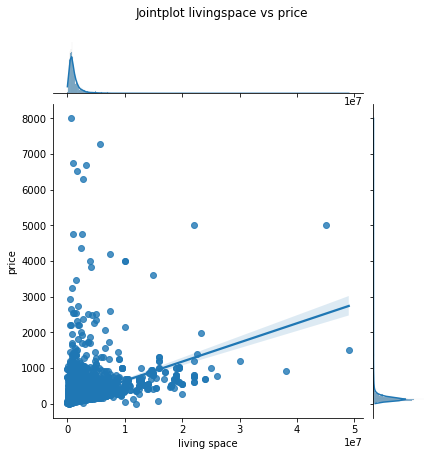

In [141]:
fig = sns.jointplot(x = df['price_cleaned'], y= df['Living space'], kind='reg')
fig.fig.suptitle('Jointplot livingspace vs price', y=1.05)
fig.set_axis_labels('living space', 'price')
plt.show()

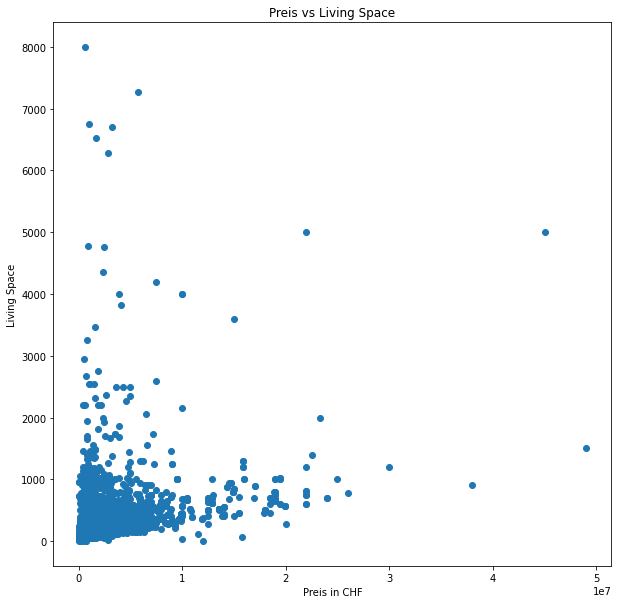

In [142]:
plot_data(df)

Ohne unterteilung in die verschiedenen Typen ist praktisch kein Linearer zusammenhang zwischen Preis und Wohnfläche erkennbar. <br>
Deshalb werden die Daten später in Ihre verschiedenen Kategorien unterteilt. <br>
Dennoch versuchen wir zuerst eine Lineare Regression auf den ganzen Datensatz anzuwenden.

MSE Train:  0.17680364019630446
MSE Test:  0.22081145406640423
MAE:  699500.110022133
MAPE:  0.8511436634333042
RMSE:  1449883.2926811315


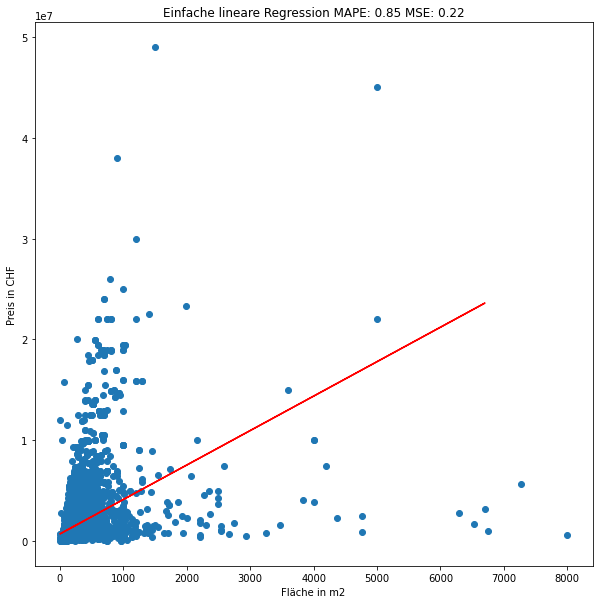

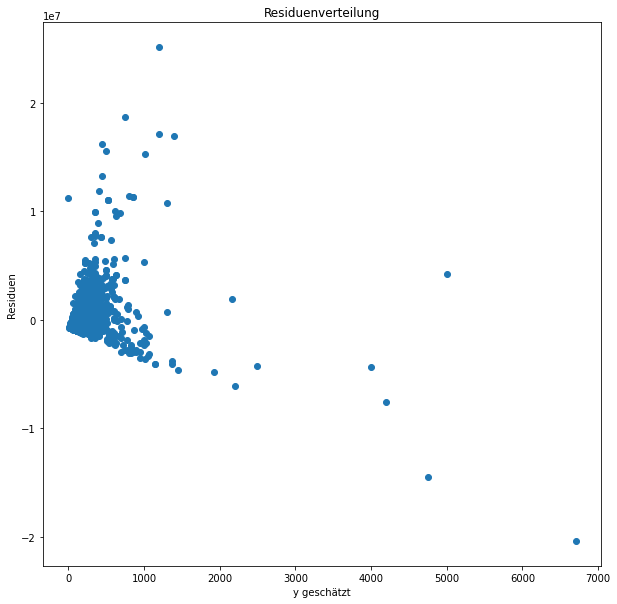

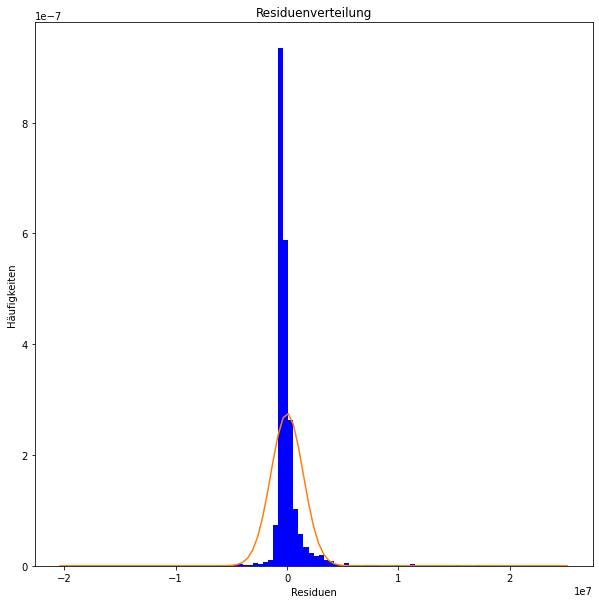

In [143]:
price_livingspace(df)

Wir versuchen den MAPE durch Varialentransformationen zu minimieren.

MSE Train:  0.387533788412627
MSE Test:  0.4064778813835992
MAE:  604991.3070176065
MAPE:  0.5675029917675929
RMSE:  1466645.2335127397


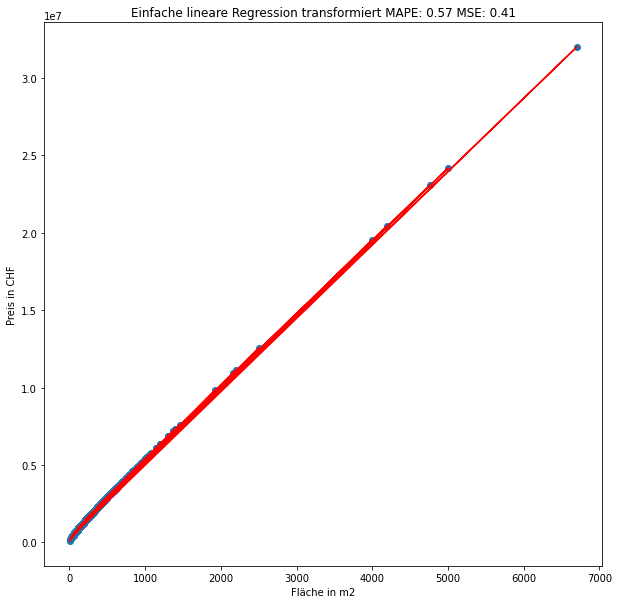

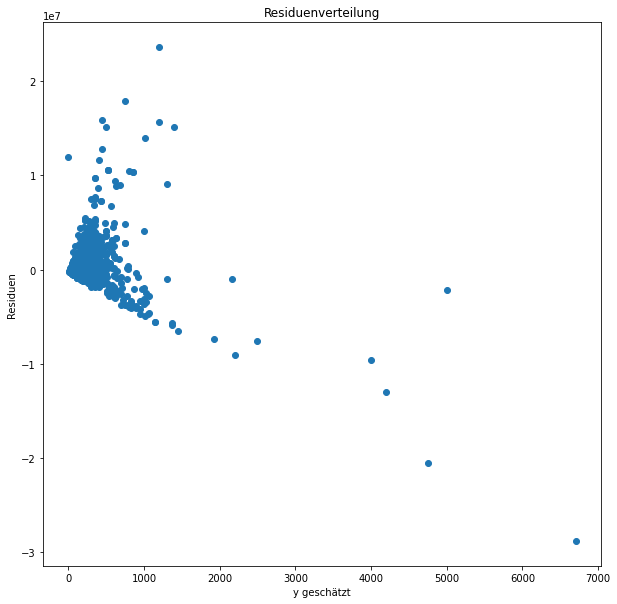

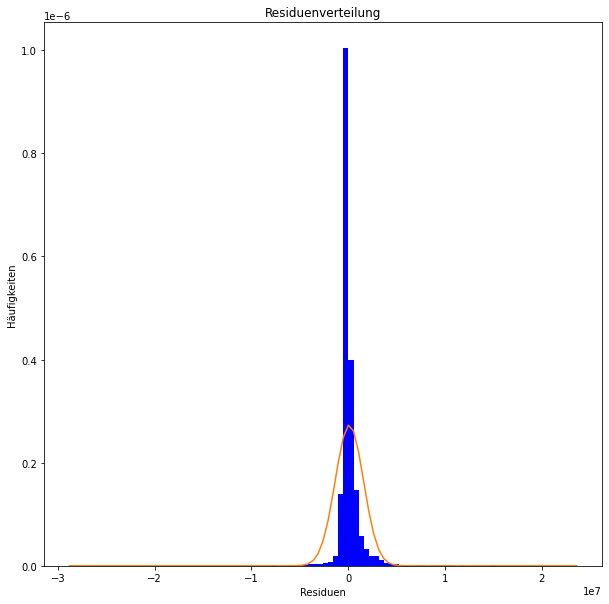

In [144]:
if variablentransformation:     
    y = df['price_cleaned'].values
    x = df['Living space'].values
    #cleaning Data
    mask = ~pd.isna(x) & ~pd.isna(y)
    x = x[mask]
    y = y[mask]
    x = x.reshape(-1,1)
    y = y.reshape(-1,1)
    x = x**0.5
    y = y**0.5
    # train test split
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
    #Linear Regression
    model = LinearRegression(fit_intercept= True).fit(x_train, y_train)
    x_new = np.arange(x.min(),x.max()).reshape(-1,1)
    y_pred = model.predict(x_test)
    #Test Score
    r_2_train = model.score(x_train,y_train)
    r_2_test = model.score(x_test,y_test)
    # variable back to original
    x_test = x_test**2
    y_test = y_test**2
    y_pred = y_pred**2
    #MAE
    mae = mean_absolute_error(y_test, y_pred)
    # MAPE
    mape = mean_absolute_percentage_error(y_test, y_pred)
    #RMSE
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    print('MSE Train: ', r_2_train)
    print('MSE Test: ', r_2_test)
    print('MAE: ', mae)
    print('MAPE: ', mape)
    print('RMSE: ', rmse)
    plt.rcParams['figure.figsize'] = [10, 10]
    plt.scatter(x_test,y_pred)
    plt.plot(x_test,y_pred, color = 'r')
    plt.ylabel('Preis in CHF')
    plt.xlabel('Fläche in m2')
    plt.title(f'Einfache lineare Regression transformiert MAPE: {round(mape,2)} MSE: {round(r_2_test,2)}')
    plt.show()

    
    #Residuenanalyse
    resid = y_test - y_pred 
    plt.scatter(x_test,resid)
    plt.ylabel('Residuen')
    plt.xlabel('y geschätzt')
    plt.title('Residuenverteilung')
    plt.show()
    
    #Distribution of resid
    n, bins, patches = plt.hist(resid, bins=100, facecolor='blue',stacked=True,density=True)

    mu = np.average(resid)
    sigma = np.std(resid)
    #Plot Normalverteilung
    y_norm = norm.pdf(bins, mu, sigma)
    plt.plot(bins, y_norm)
    plt.xlabel('Residuen')
    plt.ylabel('Häufigkeiten')
    plt.title('Residuenverteilung')
    plt.show()

Wir sehen eine deutliche Verbesserung des MAPE. <br>
Nach mehreren Versuchen sehen wir, dass die Wurzeltransformation am besten funktioniert. <br>
Dies deckt sich auch mit den rechtsschiefen Verteilungen des Preises und des Living Space. <br>
Der MAPE ist von 92% auf 63% gesunken, was immernoch ein nicht zu gebrauchender MAPE ist. <br>
Grundsätzlich kann man ab einem MAPE von unter 20% von einer guten Vorhersage ausgehen.

## Lineare Regression in verschiedenen Kategorien

Um ein bessere Modell zu erhalten, werden die Daten in Ihre verschiedenen Typen unterteilt. <br>
Dadurch erhoffen wir uns einen besseren Linearen Zusammenhang zwischen Preis und Wohnfläche.

### attic-flat

MSE Train:  0.44277727404498246
MSE Test:  0.34637815689984786
MAE:  665292.4733679857
MAPE:  0.5382736034693593
RMSE:  1247964.4143580478


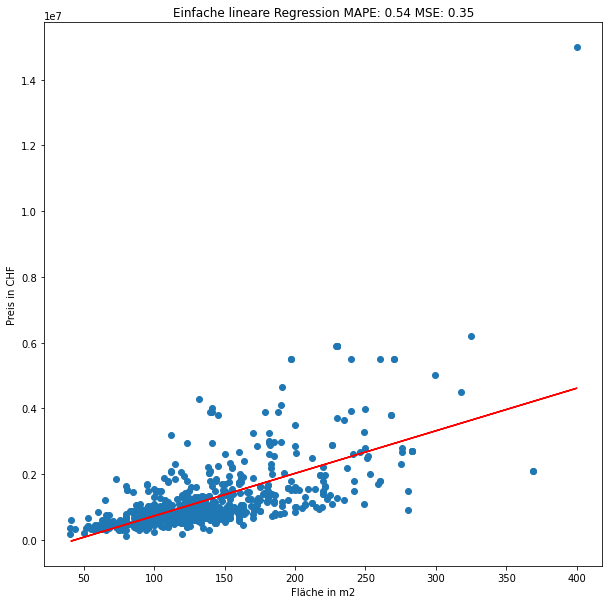

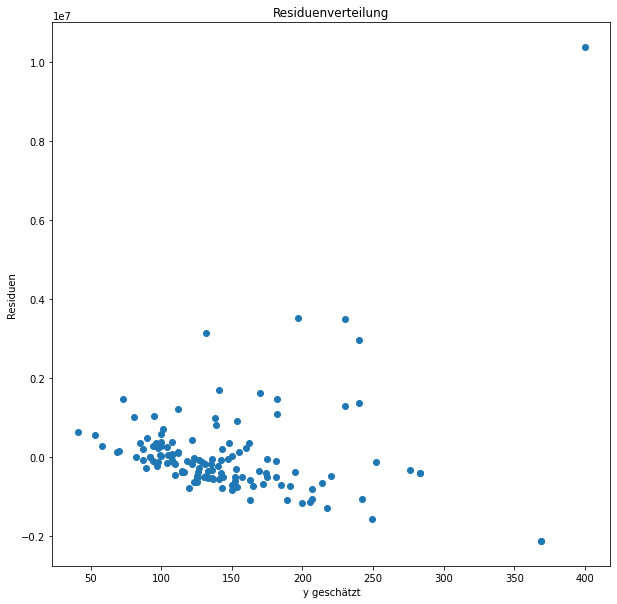

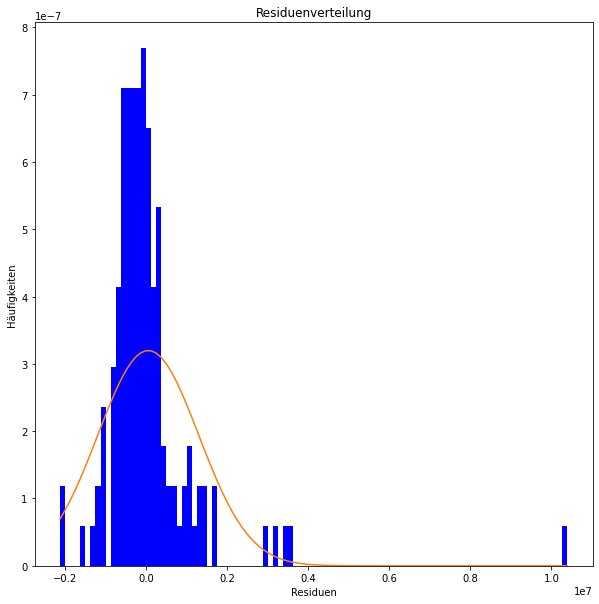

In [145]:
price_livingspace(by_type['type_attic-flat'])

Für die Attikawohnungen erhalten wir schon ein wesentlich aussagekräftigeres Modell.
Sehen jedoch einige ausreisser im oberen Pressigment, welche unser Modell verfälschen.
Mit zunehmender Wohnfläche vergrössert sich die Streuung des Preises.
Hier müsste man allenfalls den Standort genauer untersuchen (Stadtnähe, Stockwerk, etc. verfälschen unser einfaches Modell)

#### Ridge Regression

MSE Train:  0.4427772740447381
MSE Test:  0.3463780783460858
MAE:  665292.3135890358
MAPE:  0.538273457230295
RMSE:  1247964.4893496488


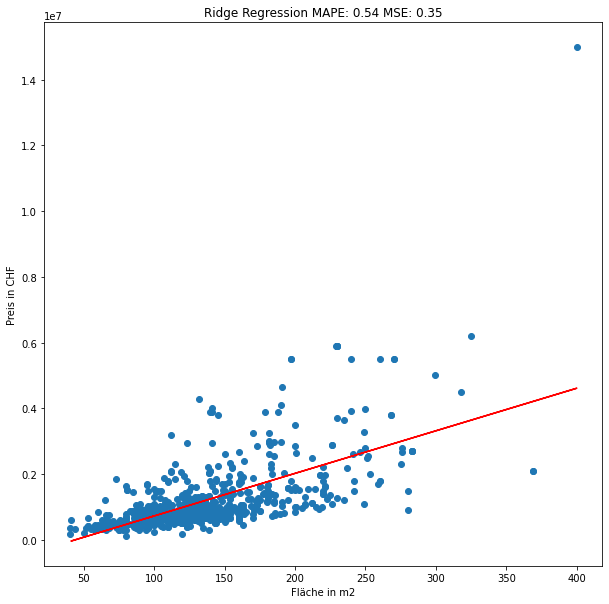

In [146]:
price_livingspace_ridge(by_type['type_attic-flat'])

#### Lasso Regression

MSE Train:  0.4427772740449821
MSE Test:  0.3463781536523738
MAE:  665292.4667625873
MAPE:  0.5382735974237114
RMSE:  1247964.4174582595


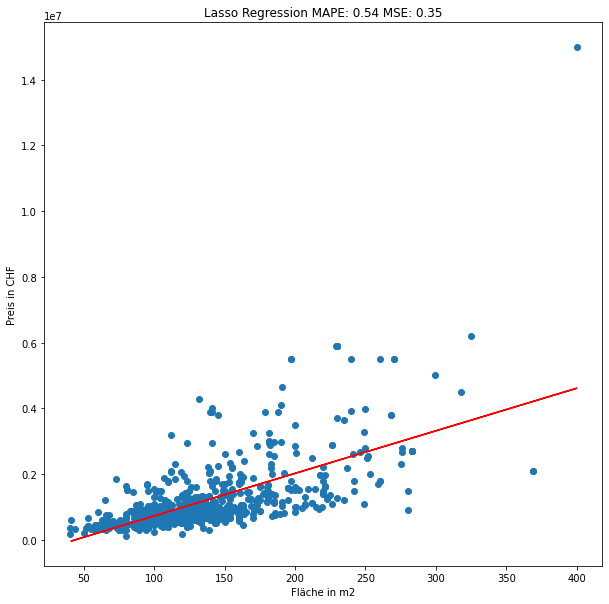

In [147]:
price_livingspace_lasso(by_type['type_attic-flat'])

Wir sehen, dass sich die Regressionen bei nur einem Feature nicht unterscheiden. <br>
Grund dafür ist, dass die Ridge- sowie die Lasso-Regression einen Straftherm beinhalten, welcher unwichtige Features ausblendet (ganz oder beinahe). <br>
Bei nur einem Feature ist es jedoch nicht möglich, dass ein Feature unwichtig ist, da es nur ein Feature gibt.

#### Variablen transformation

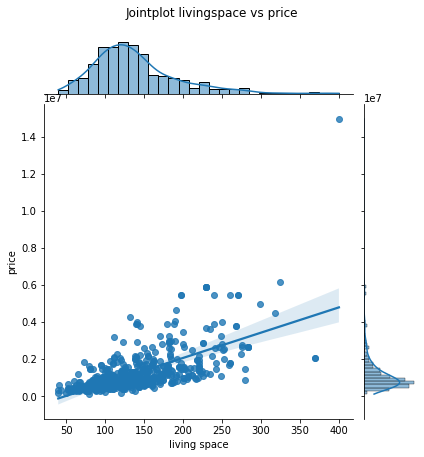

In [148]:
# distribution of price and living space
fig = sns.jointplot(y = by_type['type_attic-flat']['price_cleaned'], x= by_type['type_attic-flat']['Living space'], kind='reg')
fig.fig.suptitle('Jointplot livingspace vs price', y=1.05)
fig.set_axis_labels('living space', 'price')
plt.show()

Um unsere Regression zu verbessern versuchen wir die Daten zu transformieren.

MSE Train:  0.48714904564789263
MSE Test:  0.3802487565155125
MAE:  622158.7473376874
MAPE:  0.47301326714727737
RMSE:  1260830.1897379416


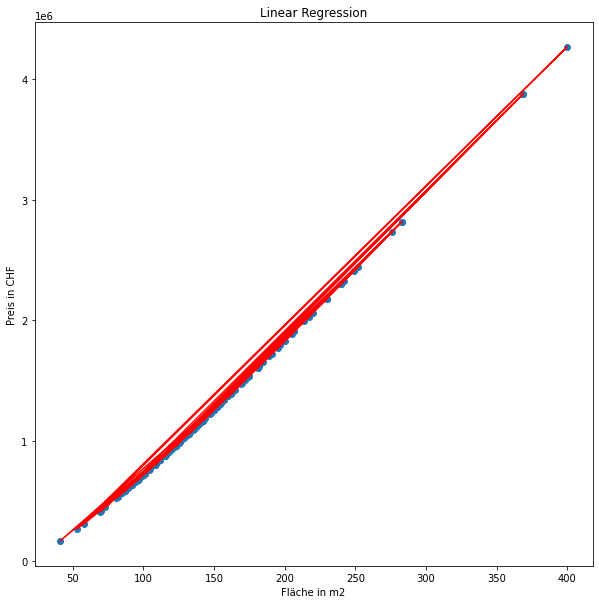

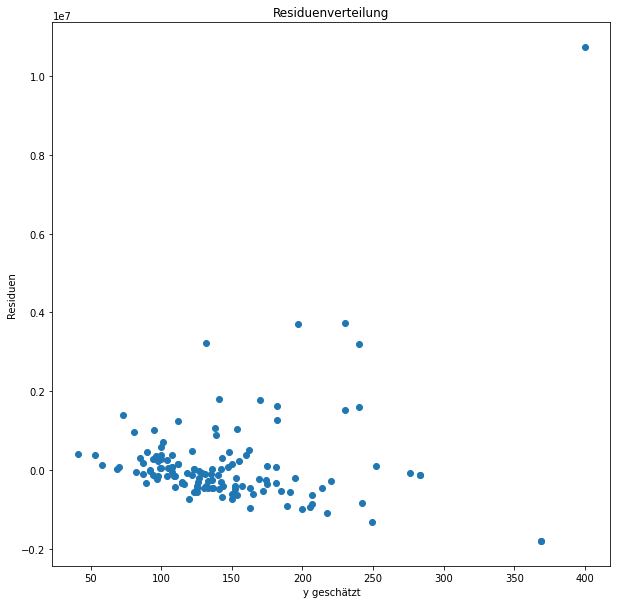

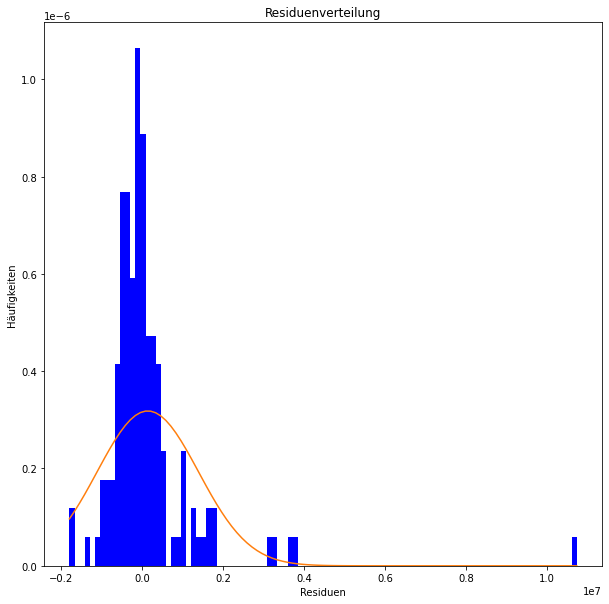

In [149]:
if variablentransformation:     
    y = by_type['type_attic-flat']['price_cleaned'].values
    x = by_type['type_attic-flat']['Living space'].values
    #cleaning Data
    mask = ~pd.isna(x) & ~pd.isna(y)
    x = x[mask]
    y = y[mask]
    x = x.reshape(-1,1)
    y = y.reshape(-1,1)
    x = x**0.5
    y = y**0.5
    # train test split
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
    #Linear Regression
    model = LinearRegression(fit_intercept= True).fit(x_train, y_train)
    x_new = np.arange(x.min(),x.max()).reshape(-1,1)
    y_pred = model.predict(x_test)
    #Test Score
    r_2_train = model.score(x_train,y_train)
    r_2_test = model.score(x_test,y_test)
    # variable back to original
    x_test = x_test**2
    y_test = y_test**2
    y_pred = y_pred**2
    #MAE
    mae = mean_absolute_error(y_test, y_pred)
    # MAPE
    mape = mean_absolute_percentage_error(y_test, y_pred)
    #RMSE
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    print('MSE Train: ', r_2_train)
    print('MSE Test: ', r_2_test)
    print('MAE: ', mae)
    print('MAPE: ', mape)
    print('RMSE: ', rmse)
    plt.scatter(x_test,y_pred)
    plt.plot(x_test,y_pred, color = 'r')
    plt.ylabel('Preis in CHF')
    plt.xlabel('Fläche in m2')
    plt.title('Linear Regression')
    plt.show()
    
    #Residuenanalyse
    resid = y_test - y_pred 
    plt.scatter(x_test,resid)
    plt.ylabel('Residuen')
    plt.xlabel('y geschätzt')
    plt.title('Residuenverteilung')
    plt.show()
    
    #Distribution of resid
    n, bins, patches = plt.hist(resid, bins=100, facecolor='blue',stacked=True,density=True)

    mu = np.average(resid)
    sigma = np.std(resid)
    #Plot Normalverteilung
    y_norm = norm.pdf(bins, mu, sigma)
    plt.plot(bins, y_norm)
    plt.xlabel('Residuen')
    plt.ylabel('Häufigkeiten')
    plt.title('Residuenverteilung')
    plt.show()

Durch die Variablen transformationen konnten wir den MAPE von 40% auf 36% senken. <br>
Dies ist ein guter Wert, jedoch ist es immer noch nicht möglich, mit einem Modell zu arbeiten, welches einen MAPE von 36% hat. 

### castle

R^2:  0.11517963486451621


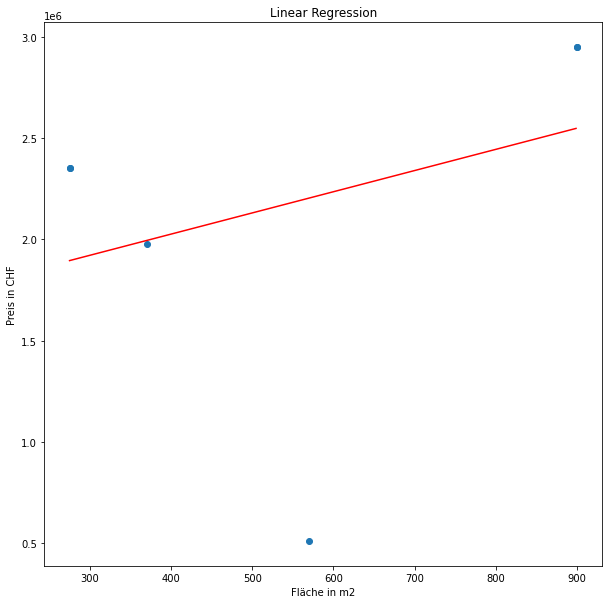

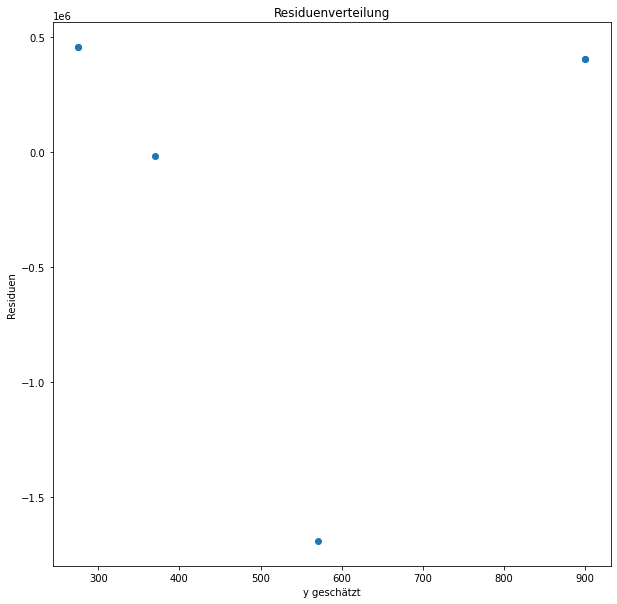

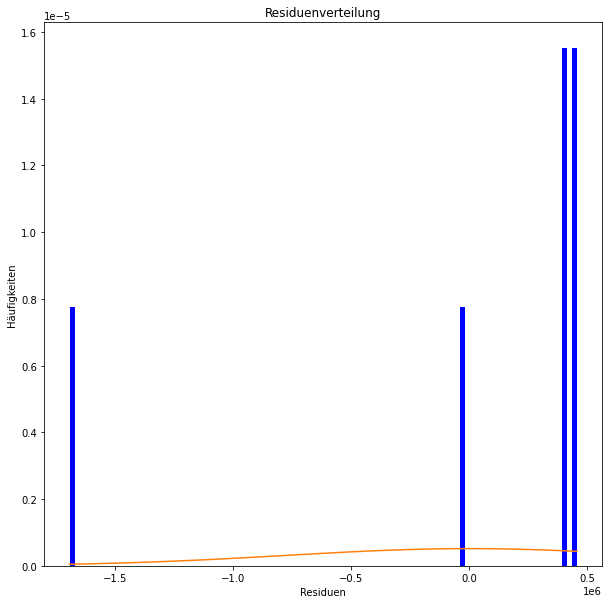

In [150]:
price_livingspace_without_train_test(by_type['type_castle'])

Hier sehen wir ein Modell, bei welchem die Steigung nahe an Null geht und lediglich der Intercept entscheidend ist,
Das Modell performt jedoch auch sehr schlecht.

### attic-room

R^2:  0.923827290023324


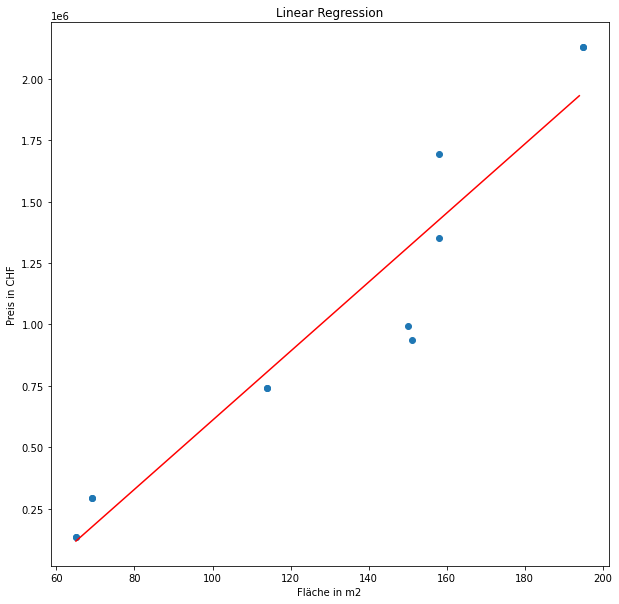

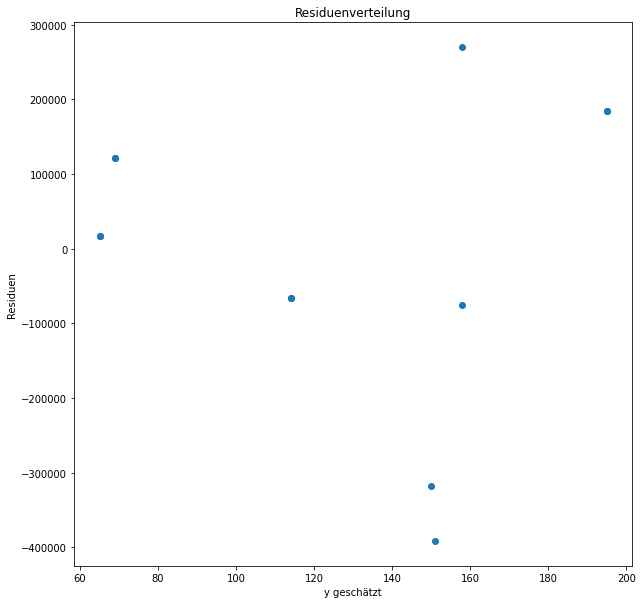

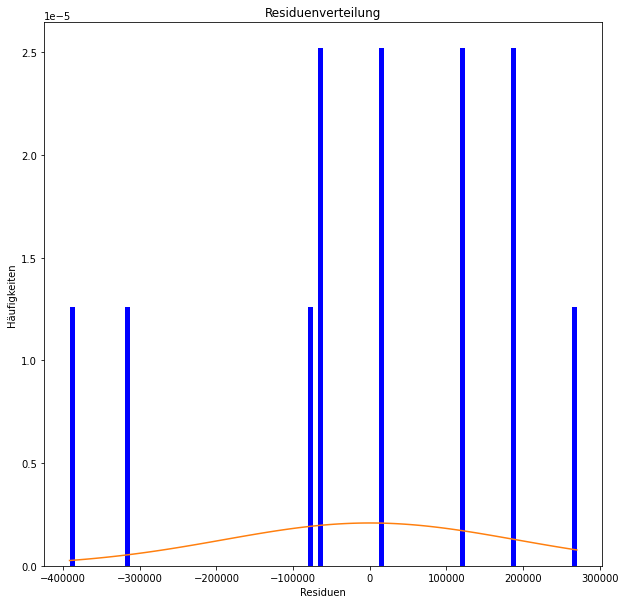

In [151]:
price_livingspace_without_train_test(by_type['type_attic-room'])

Dieses Modell performt mit einem Score von 92% sehr gut, was jedoch auch an den wenigen Datenpunkten geschuldet ist.
Dennoch sehen wir einen schönen Linearen anstieg des Preises.

### detached_house

R^2:  0.15862274357380102


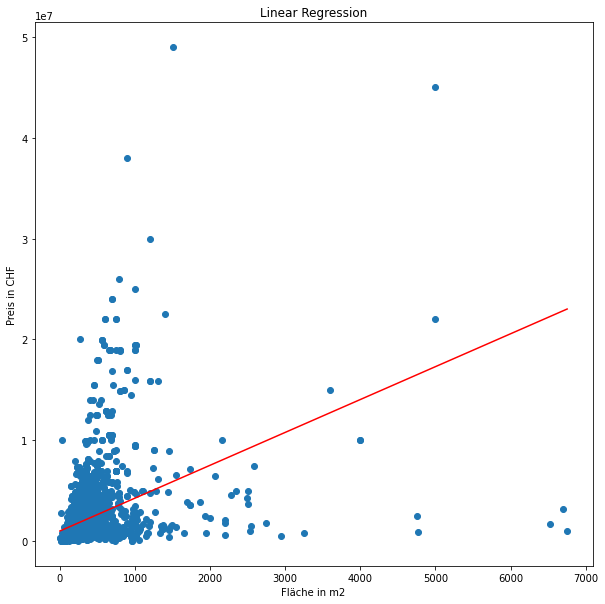

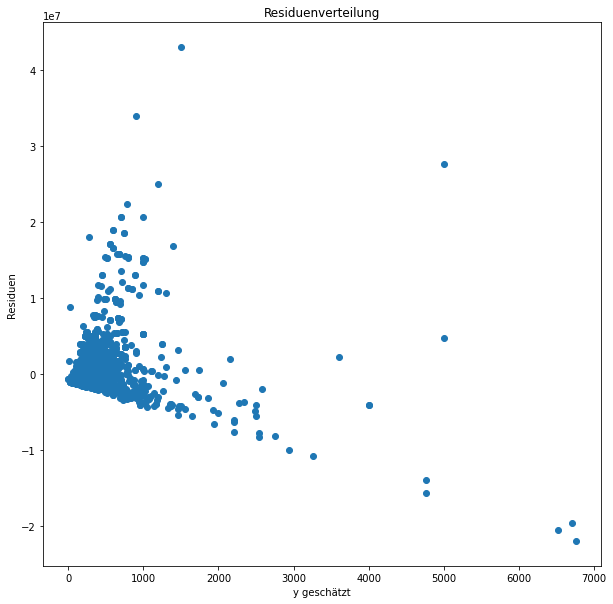

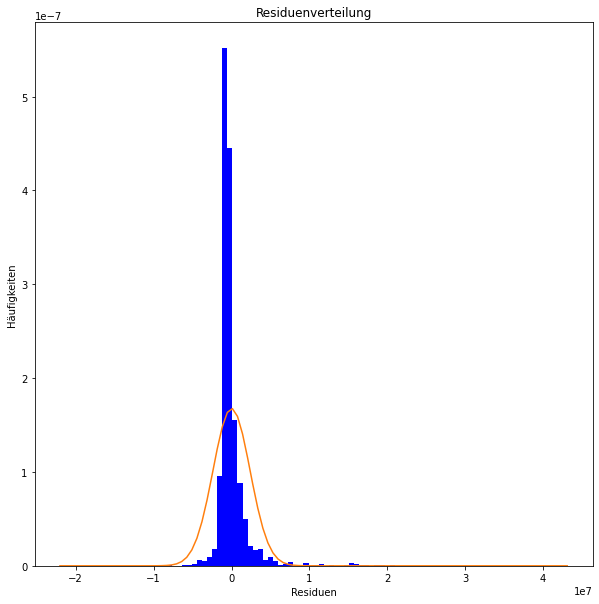

In [152]:
price_livingspace_without_train_test(by_type['type_detached-house'])

Auch hier haben wir wieder das ähnliche Problem wie bei den Chalets.
Es scheint wichtige weitere Einflüsse auf den Preis zu geben, welche in einem guten Vorhersagemodell auch beachtet werden müssen.

### rustico

R^2:  0.01194207148595483


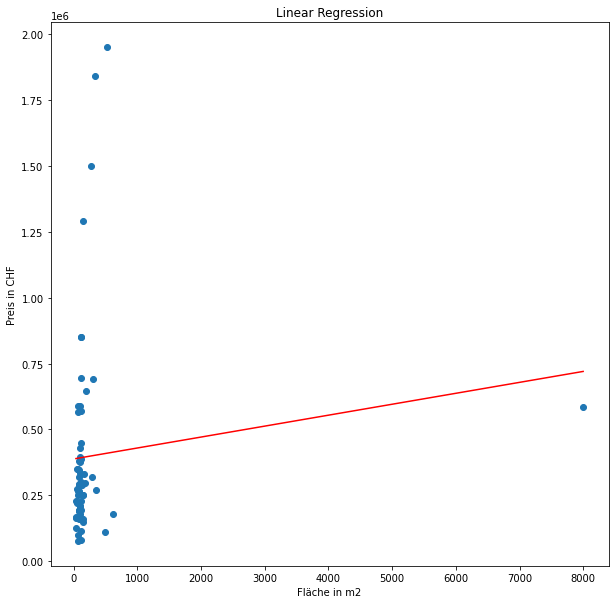

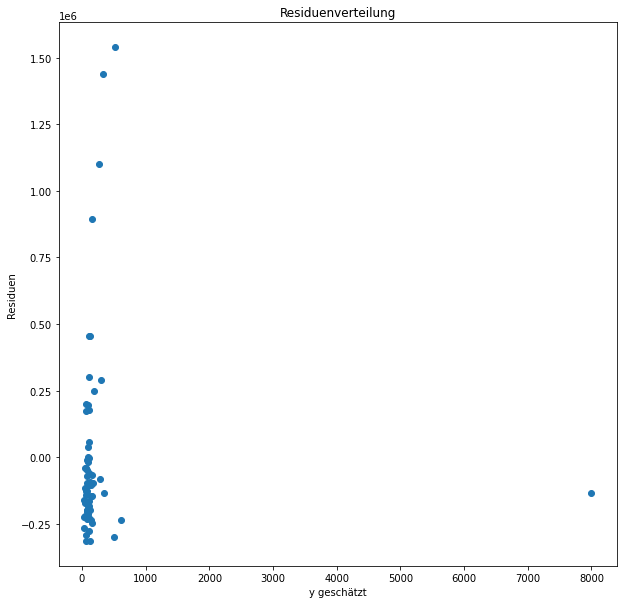

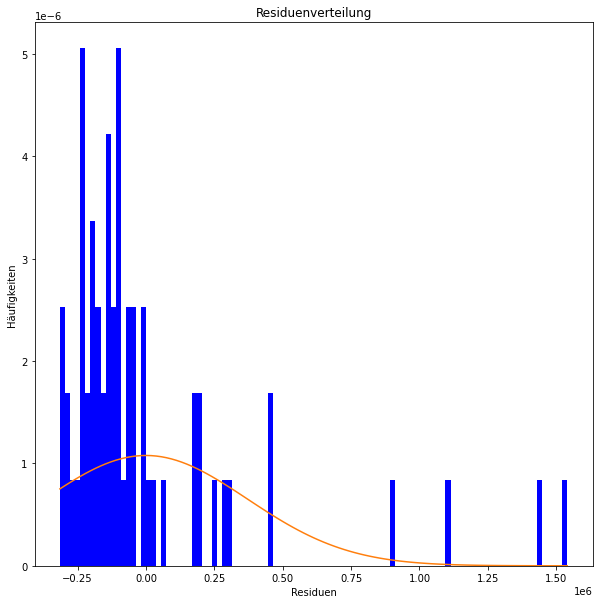

In [153]:
price_livingspace_without_train_test(by_type['type_rustico'])

In diesem Beispiel sehen wir, wie sehr ein Ausreisser das Modell verfälschen kann.
Unten sehen wir das Modell, in welchem die Ausreisser aussortiert werden.

In [154]:
#delete all rows with living_space_m2 > 1000
df_rustico = by_type['type_rustico']

df_rustico = df_rustico[df_rustico['Living space'] < 1000]

R^2:  0.16821078945186596


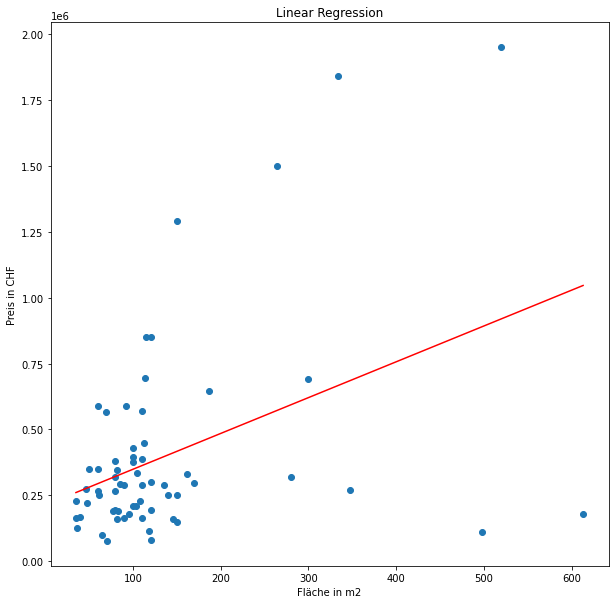

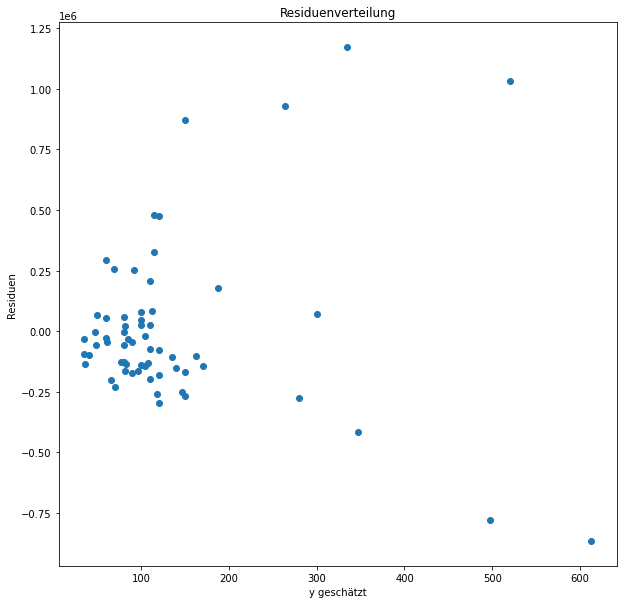

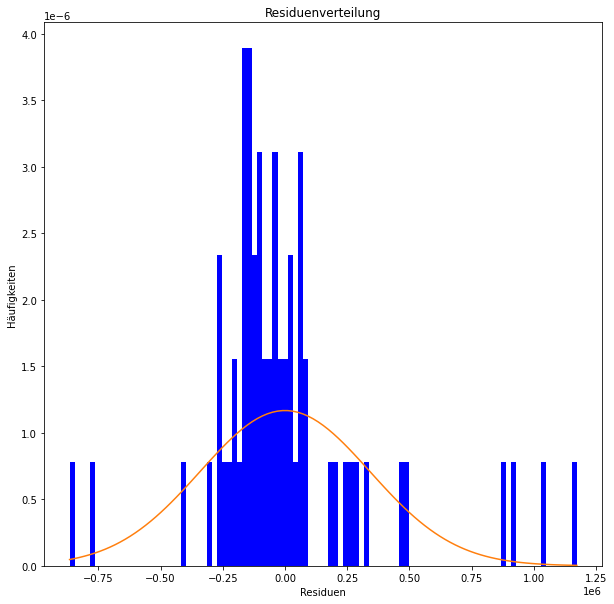

In [155]:
price_livingspace_without_train_test(df_rustico)

Das Modell performt gleich massiv besser.
Wir sehen welch grosse Einflüsse Ausreisser auf unser Modell haben kann.

## Linear Regression with normalized Data

In [156]:
from sklearn import preprocessing
#Dataframe mit allen Wohnungen
df_rustico = by_type['type_rustico']

# select price and living space from df_rustico and safe in a new dataframe
y,x = df_rustico['price_cleaned'].values, df_rustico['Living space'].values

#cleaning Data
mask = ~pd.isna(x) & ~pd.isna(y)
x = x[mask].reshape(-1,1)
y = y[mask].reshape(-1,1)

x_normalized = preprocessing.normalize(x, axis=0).reshape(-1,1)

# create new dataframe with y as 'price' and x_normalized as 'Living space'
df_rustico_normalized = pd.DataFrame({'price_cleaned': y.reshape(-1), 'Living space': x_normalized.reshape(-1)})
df_rustico_normalized.head(5)

,price_cleaned,Living space
0,585000.0,0.985126
1,395000.0,0.012314
2,295000.0,0.010467
3,165000.0,0.004310
4,570000.0,0.013545


R^2:  0.01194207148595483


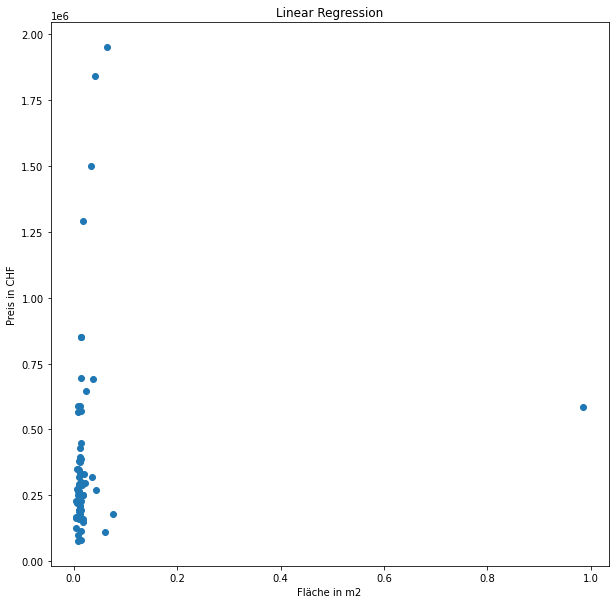

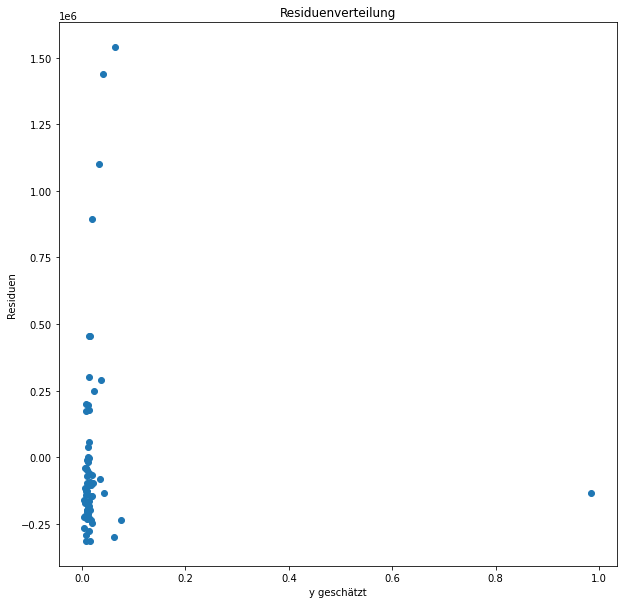

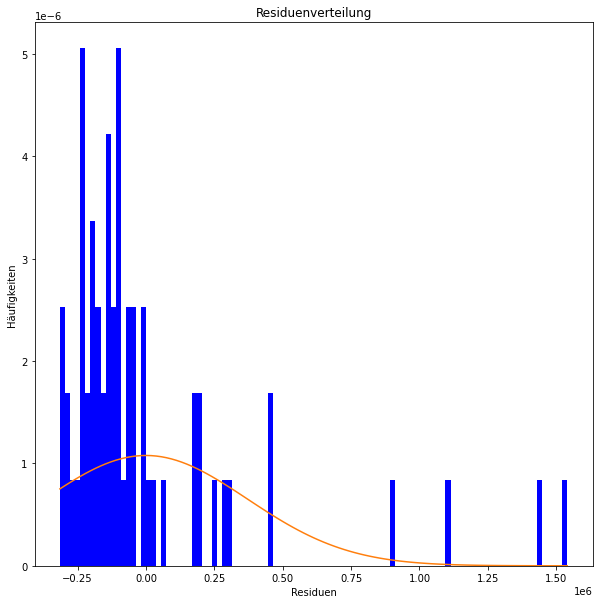

In [157]:
# Linear Regression with Normalized X 
price_livingspace_without_train_test(df_rustico_normalized)

Wie wir sehen nützt uns die Normalisierung bei nur einem Feature nichts, das Modell Performt gleich.
Der selbe Datensatz wurde auch ohne Ausreisser Normalisiert und führte zu gleichem Resultat.